In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from google.colab import files

uploaded = files.upload()

In [2]:
df = pd.read_csv('cell2celltrain.csv')

In [3]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


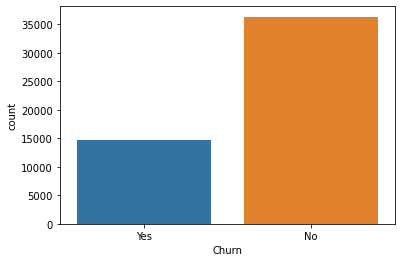

In [5]:
sns.countplot(df['Churn'])
plt.show()

**Checking for Null Values**


In [6]:
df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## **Percentage Null**

In [7]:
round(df.isnull().sum() / len(df) * 100,2)

CustomerID                   0.00
Churn                        0.00
MonthlyRevenue               0.31
MonthlyMinutes               0.31
TotalRecurringCharge         0.31
DirectorAssistedCalls        0.31
OverageMinutes               0.31
RoamingCalls                 0.31
PercChangeMinutes            0.72
PercChangeRevenues           0.72
DroppedCalls                 0.00
BlockedCalls                 0.00
UnansweredCalls              0.00
CustomerCareCalls            0.00
ThreewayCalls                0.00
ReceivedCalls                0.00
OutboundCalls                0.00
InboundCalls                 0.00
PeakCallsInOut               0.00
OffPeakCallsInOut            0.00
DroppedBlockedCalls          0.00
CallForwardingCalls          0.00
CallWaitingCalls             0.00
MonthsInService              0.00
UniqueSubs                   0.00
ActiveSubs                   0.00
ServiceArea                  0.05
Handsets                     0.00
HandsetModels                0.00
CurrentEquipme

# Null Values are very less. So the records can be removed.

In [8]:
round((df[df['Churn'] == 'Yes'].isnull().sum() / len(df) * 100),2)

CustomerID                   0.00
Churn                        0.00
MonthlyRevenue               0.14
MonthlyMinutes               0.14
TotalRecurringCharge         0.14
DirectorAssistedCalls        0.14
OverageMinutes               0.14
RoamingCalls                 0.14
PercChangeMinutes            0.41
PercChangeRevenues           0.41
DroppedCalls                 0.00
BlockedCalls                 0.00
UnansweredCalls              0.00
CustomerCareCalls            0.00
ThreewayCalls                0.00
ReceivedCalls                0.00
OutboundCalls                0.00
InboundCalls                 0.00
PeakCallsInOut               0.00
OffPeakCallsInOut            0.00
DroppedBlockedCalls          0.00
CallForwardingCalls          0.00
CallWaitingCalls             0.00
MonthsInService              0.00
UniqueSubs                   0.00
ActiveSubs                   0.00
ServiceArea                  0.02
Handsets                     0.00
HandsetModels                0.00
CurrentEquipme

In [9]:
for i in df.columns:
    df.dropna(subset=[i],inplace=True)

In [10]:
df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

## **Exploratory Data Analysis**

In [11]:
cat_df = df.select_dtypes(include=[np.object])
num_df = df.select_dtypes(include=[np.number])

In [12]:
corr_df = num_df.copy()
corr_df.corr()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
CustomerID,1.000000,-0.000594,0.083850,0.051110,-0.004802,0.004191,0.000562,-0.008727,0.004869,0.064191,0.037196,0.083486,0.119511,0.056031,0.039866,0.035098,0.025262,-0.011570,0.097891,0.065182,0.001986,0.022732,-0.766762,-0.022168,-0.039663,-0.285097,-0.294085,-0.409052,-0.116715,-0.087367,-0.061926,-0.046935,0.007145,-0.136868,-0.171203
MonthlyRevenue,-0.000594,1.000000,0.712734,0.629391,0.407523,0.787317,0.304086,-0.027052,-0.014223,0.429374,0.232651,0.450751,0.189579,0.200998,0.604762,0.495088,0.373419,0.642019,0.473354,0.417567,0.008935,0.469497,0.001205,-0.014949,-0.044068,0.243892,0.236179,-0.216644,-0.108608,-0.105829,0.012019,0.014795,0.017879,-0.079309,0.035417
MonthlyMinutes,0.083850,0.712734,1.000000,0.585375,0.392950,0.569083,0.112028,-0.044257,-0.038438,0.593149,0.318114,0.645650,0.375238,0.287670,0.828206,0.694517,0.558065,0.772486,0.765215,0.573916,0.018394,0.614970,-0.065558,-0.028869,-0.066116,0.303903,0.293145,-0.311033,-0.163928,-0.143321,0.011856,0.014966,0.064916,-0.145964,0.045723
TotalRecurringCharge,0.051110,0.629391,0.585375,1.000000,0.311440,0.201011,0.073855,-0.016284,-0.024126,0.354148,0.178584,0.359008,0.153056,0.148344,0.482062,0.410429,0.307202,0.552995,0.369690,0.335165,0.009562,0.355959,-0.045156,-0.020638,-0.058606,0.235735,0.226597,-0.247592,-0.106111,-0.101134,-0.017562,-0.002218,0.036912,-0.075415,0.044019
DirectorAssistedCalls,-0.004802,0.407523,0.392950,0.311440,1.000000,0.287109,0.070134,-0.025542,-0.014696,0.262960,0.140135,0.306220,0.094066,0.134143,0.282247,0.315242,0.186776,0.419658,0.274796,0.253054,0.002759,0.308005,0.017889,-0.001969,-0.014442,0.183002,0.170469,-0.120887,-0.058874,-0.057644,0.010556,0.013857,-0.005592,-0.014985,0.022616
OverageMinutes,0.004191,0.787317,0.569083,0.201011,0.287109,1.000000,0.062955,-0.026377,-0.014570,0.329464,0.190967,0.362627,0.137185,0.164275,0.513705,0.404062,0.317985,0.517419,0.390702,0.328767,0.004307,0.457071,0.003375,-0.003472,-0.014086,0.143777,0.143102,-0.124190,-0.065212,-0.062350,0.014741,0.008474,0.008452,-0.048051,0.021671
RoamingCalls,0.000562,0.304086,0.112028,0.073855,0.070134,0.062955,1.000000,-0.055106,-0.093108,0.066135,0.029070,0.038768,0.020528,0.024108,0.045131,0.045443,0.020652,0.062736,0.031287,0.059513,0.003524,0.036037,-0.009516,-0.002963,-0.002182,0.024344,0.022641,-0.027969,-0.010467,-0.012171,-0.002423,-0.000440,-0.007440,-0.014034,0.004952
PercChangeMinutes,-0.008727,-0.027052,-0.044257,-0.016284,-0.025542,-0.026377,-0.055106,1.000000,0.607504,-0.082284,-0.054548,-0.085781,-0.040239,-0.028807,-0.106360,-0.062718,-0.068281,-0.108065,-0.089657,-0.087335,-0.003306,-0.128228,0.005496,0.002349,0.009994,-0.011222,-0.010669,-0.005830,0.014243,0.003986,-0.021400,-0.008232,0.003520,0.012162,-0.004715
PercChangeRevenues,0.004869,-0.014223,-0.038438,-0.024126,-0.014696,-0.014570,-0.093108,0.607504,1.000000,-0.036180,-0.031916,-0.054309,-0.031468,0.014467,-0.078286,-0.038975,-0.044919,-0.078299,-0.051762,-0.044256,-0.002710,-0.092176,-0.005759,0.002367,0.005341,-0.016845,-0.015881,0.006046,0.006914,0.001920,-0.018961,-0.012295,0.001244,0.005066,-0.005234
DroppedCalls,0.064191,0.429374,0.593149,0.354148,0.262960,0.329464,0.066135,-0.082284,-0.036180,1.000000,0.184385,0.541497,0.293616,0.261190,0.517244,0.564891,0.395626,0.573118,0.600716,0.717652,0.004666,0.397990,-0.044335,-0.020567,-0.050117,0.225189,0.217574,-0.216252,-0.119905,-0.108245,0.020417,0.014650,0.024921,-0.097358,0.031109


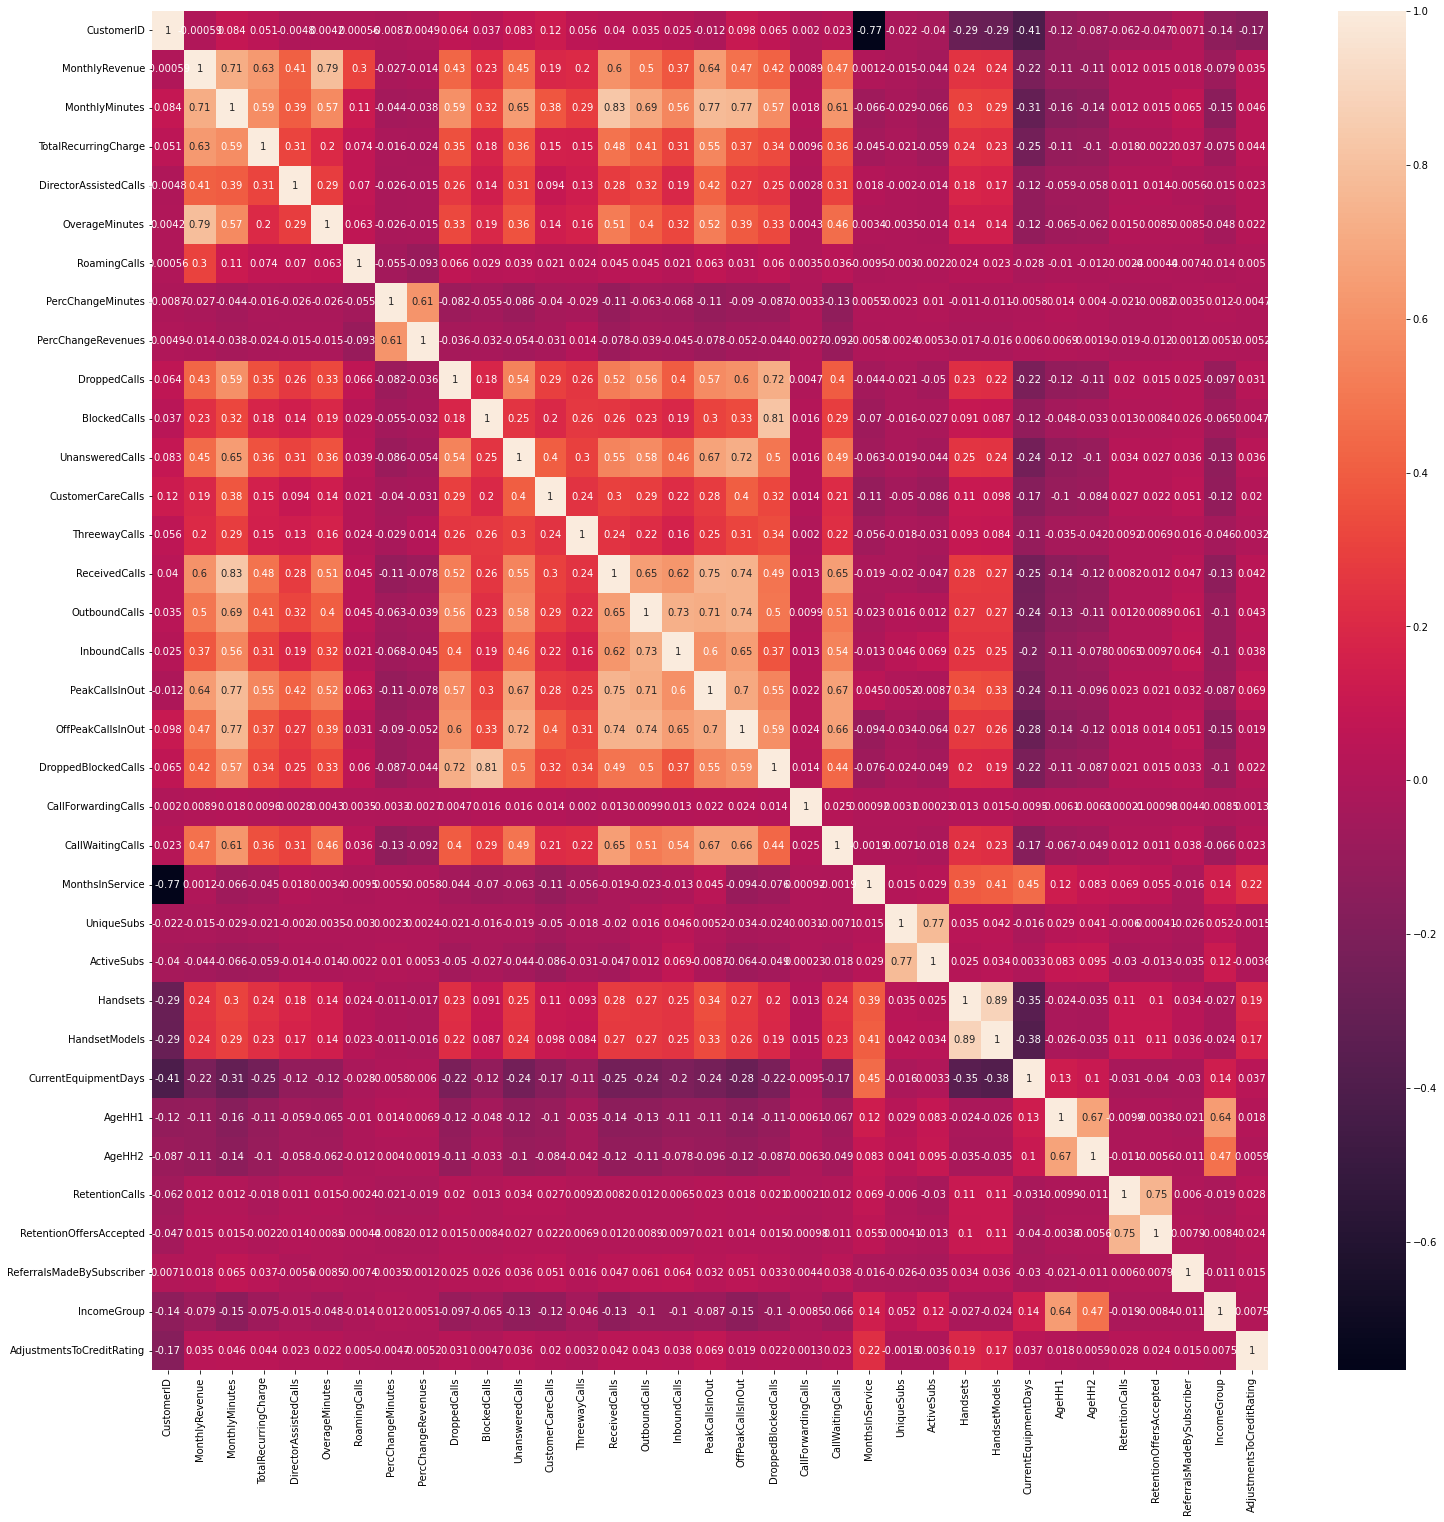

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_df.corr(),annot=True)
plt.show()

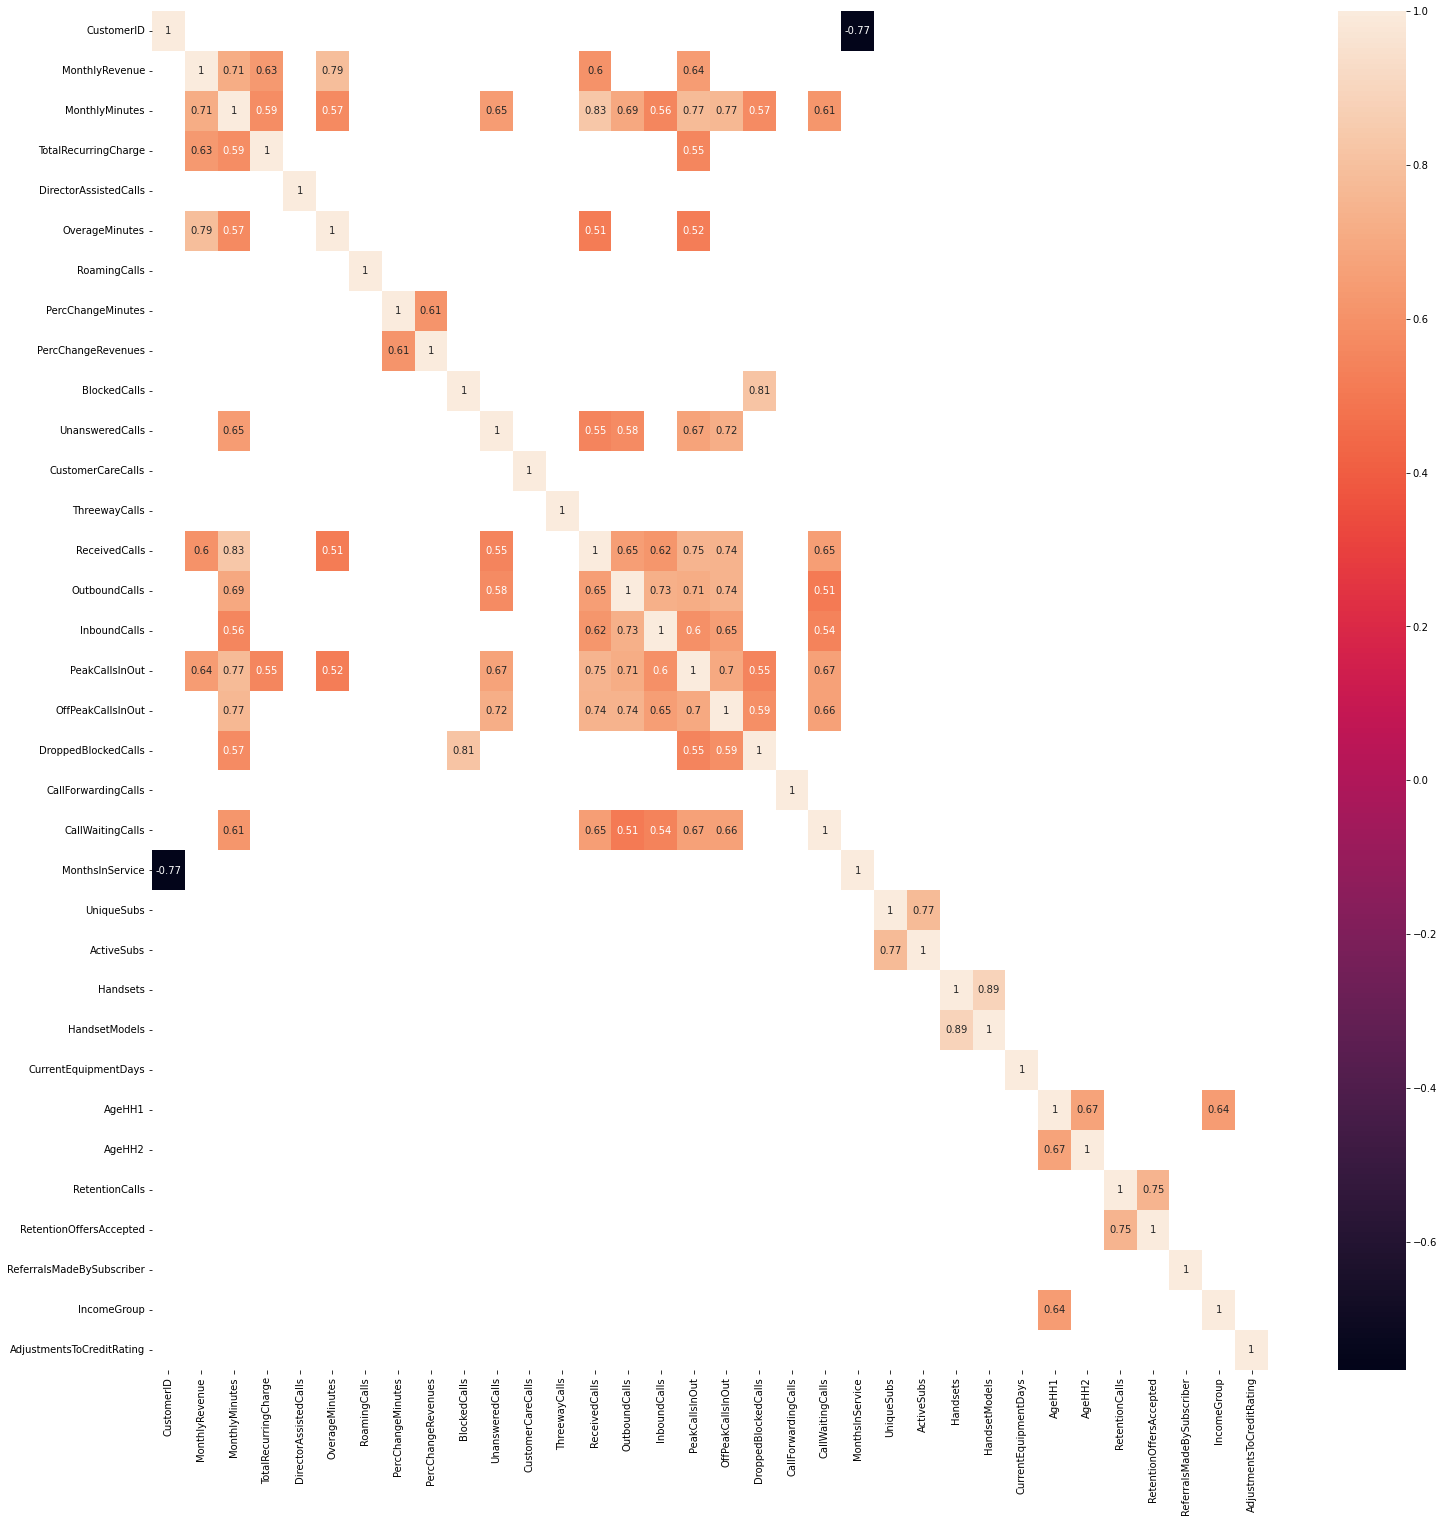

In [14]:
# To Check if it helps after removing Blocked Calls
plt.figure(figsize=(25,25))
corr_df1 = corr_df.drop(['DroppedCalls'],axis=1)
sns.heatmap(corr_df1.corr()[(corr_df.corr() >= 0.5) | (corr_df.corr() <= -0.5)],annot=True)
plt.show()

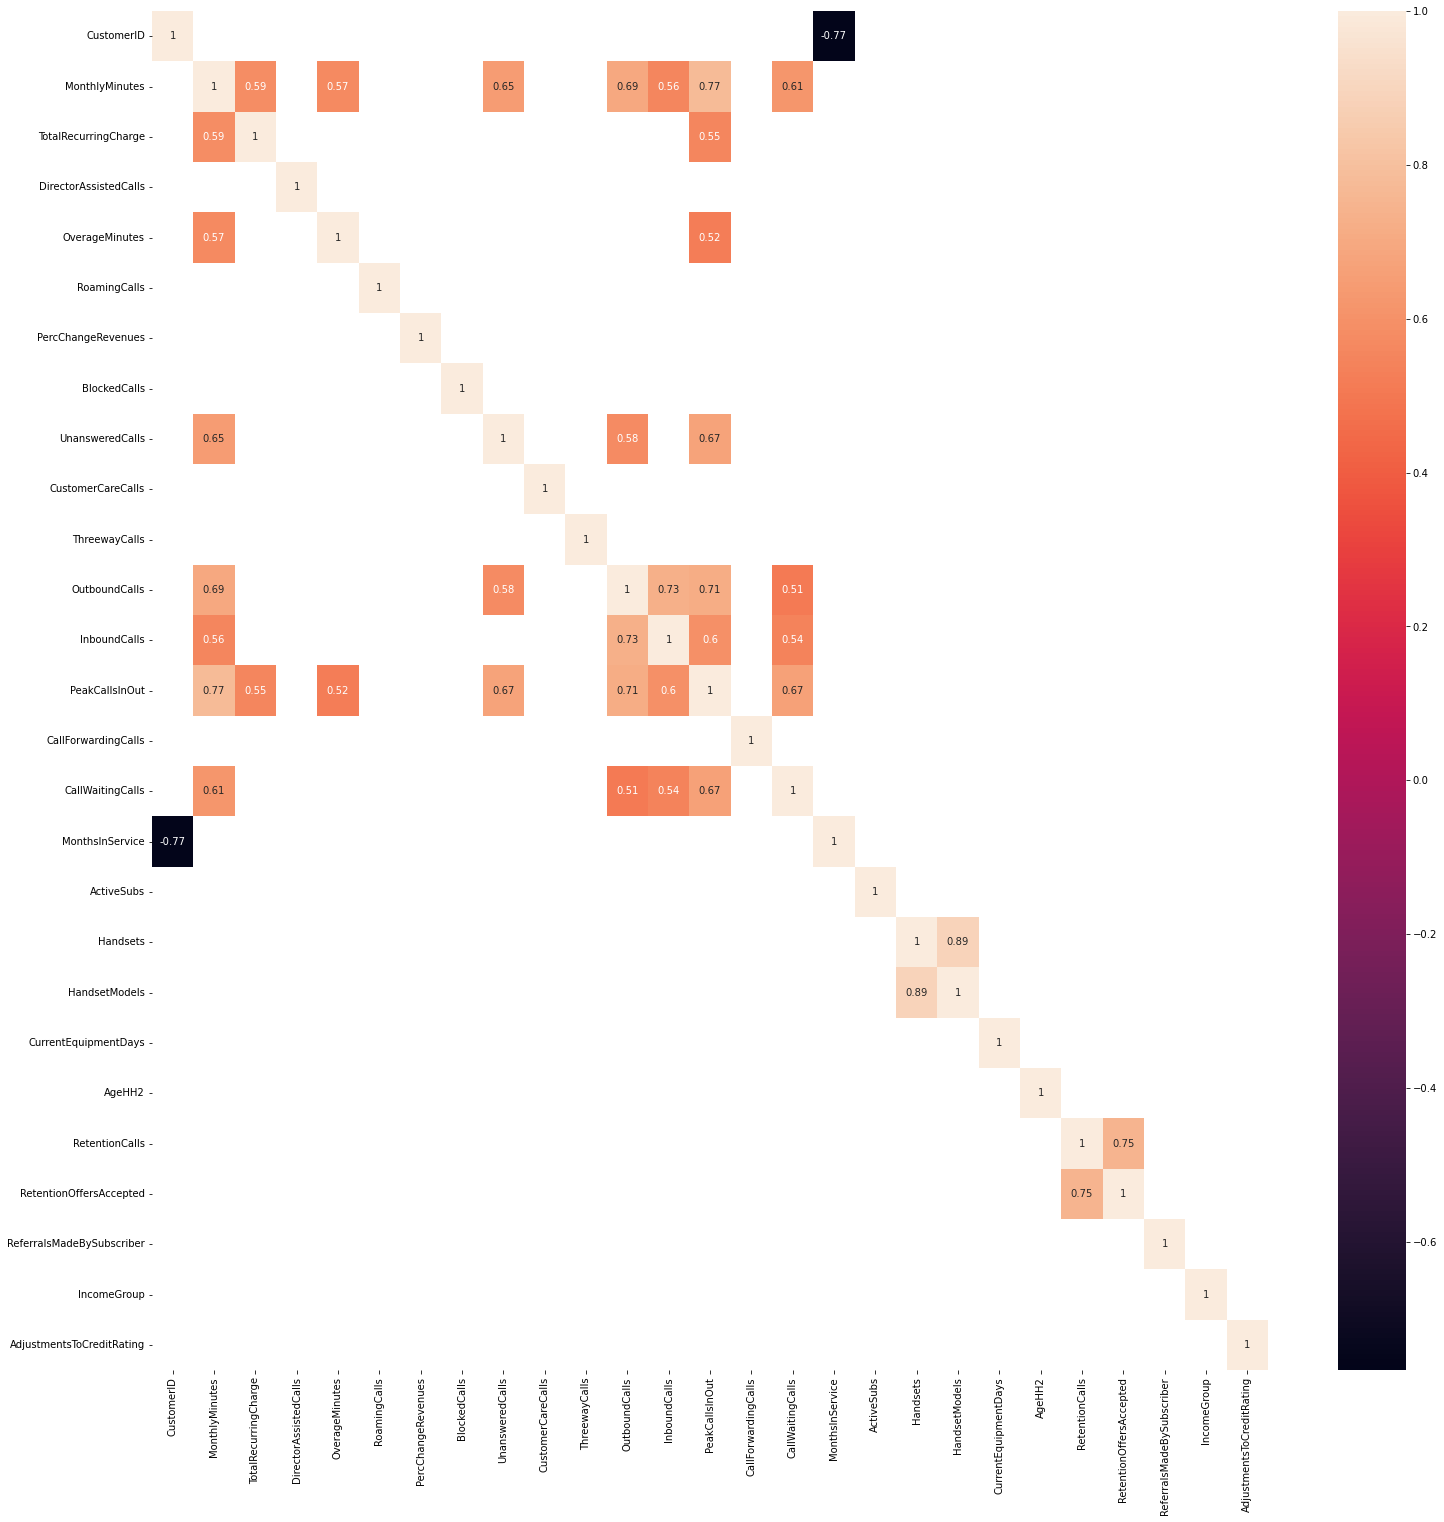

In [15]:
# Check if Unique Subs and PeakCallsInOut Helps
corr_df2 = corr_df1.drop(['UniqueSubs','DroppedBlockedCalls','OffPeakCallsInOut','MonthlyRevenue',
                          'AgeHH1','ReceivedCalls','PercChangeMinutes'],axis=1)
plt.figure(figsize=(25,25))

sns.heatmap(corr_df2.corr()[(corr_df2.corr() >= 0.5) | (corr_df2.corr() <= -0.5)],annot=True)
plt.show()

In [16]:
col = ['MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeRevenues', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating']

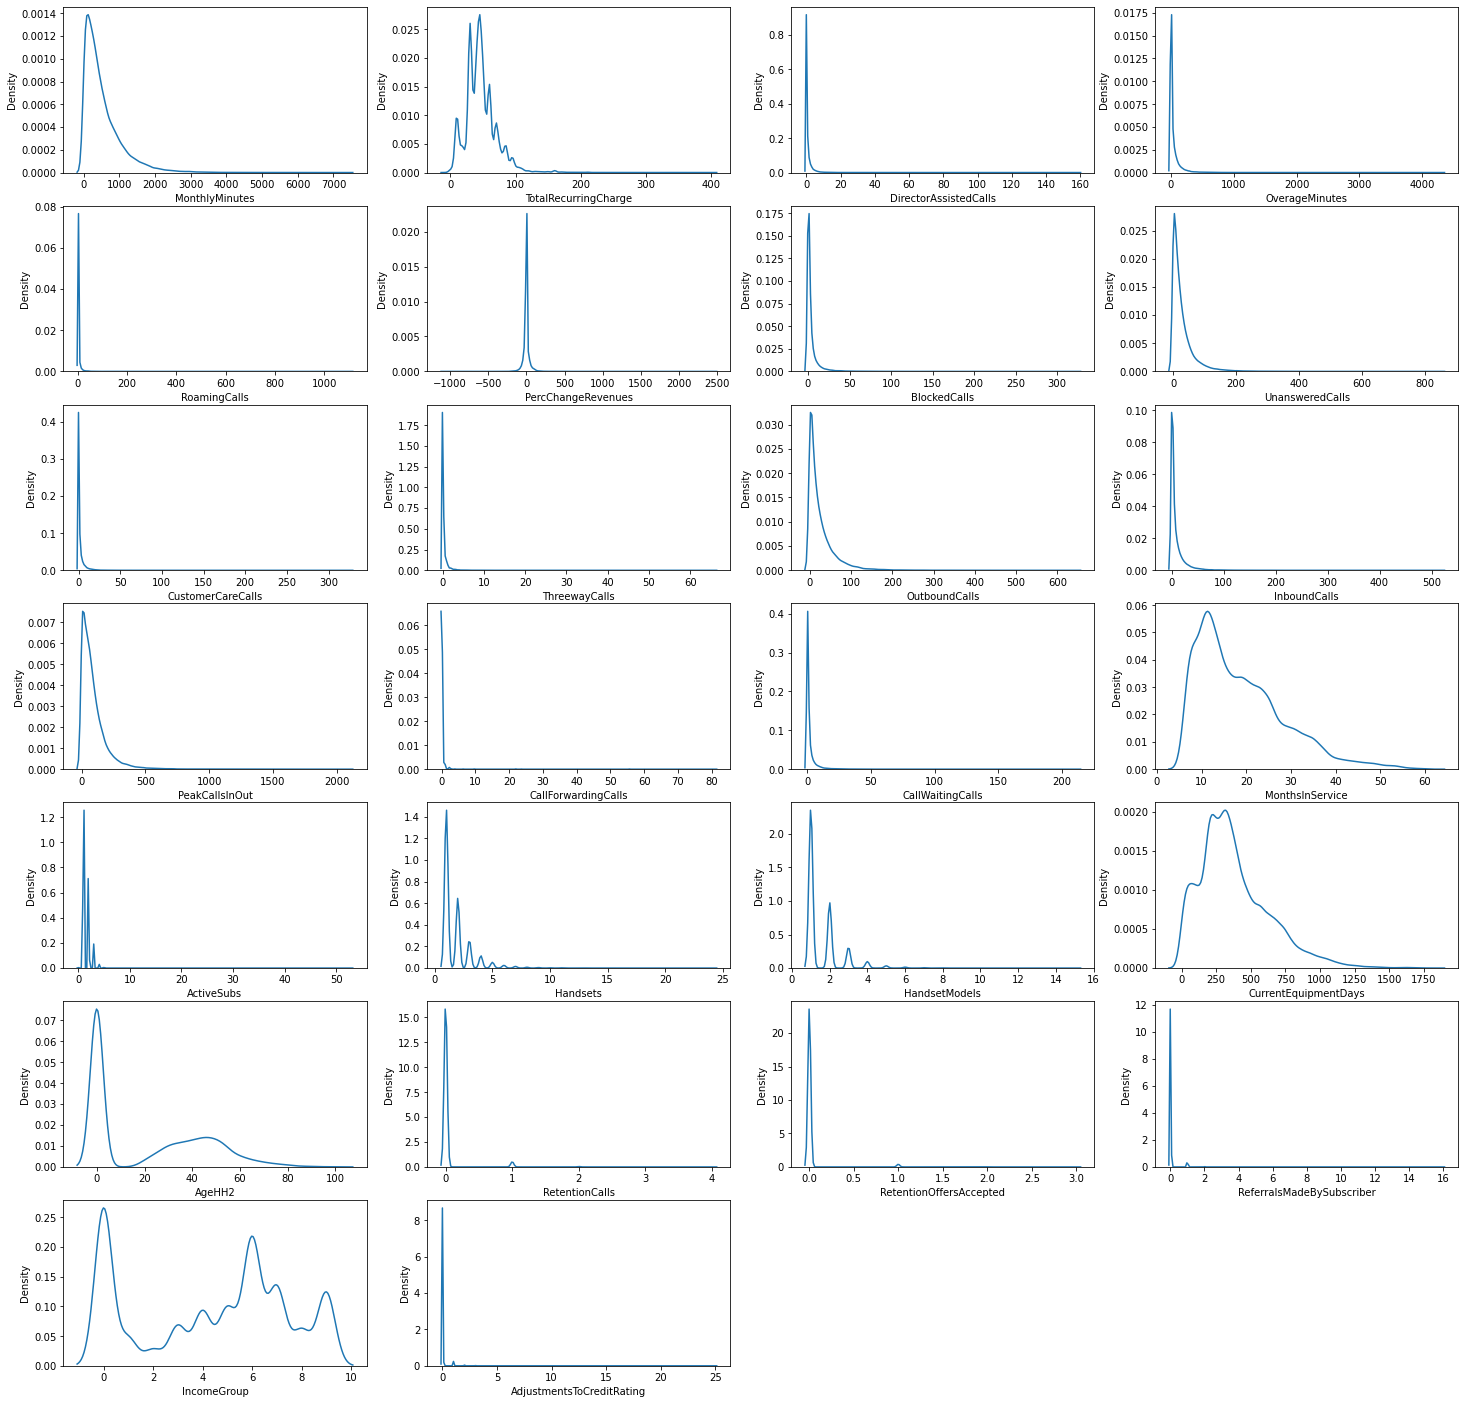

In [17]:
plt.figure(figsize=(25,25))
for i, j in enumerate(col):
    plt.subplot(7,4,i+1)
    sns.kdeplot(df[j])
plt.show()

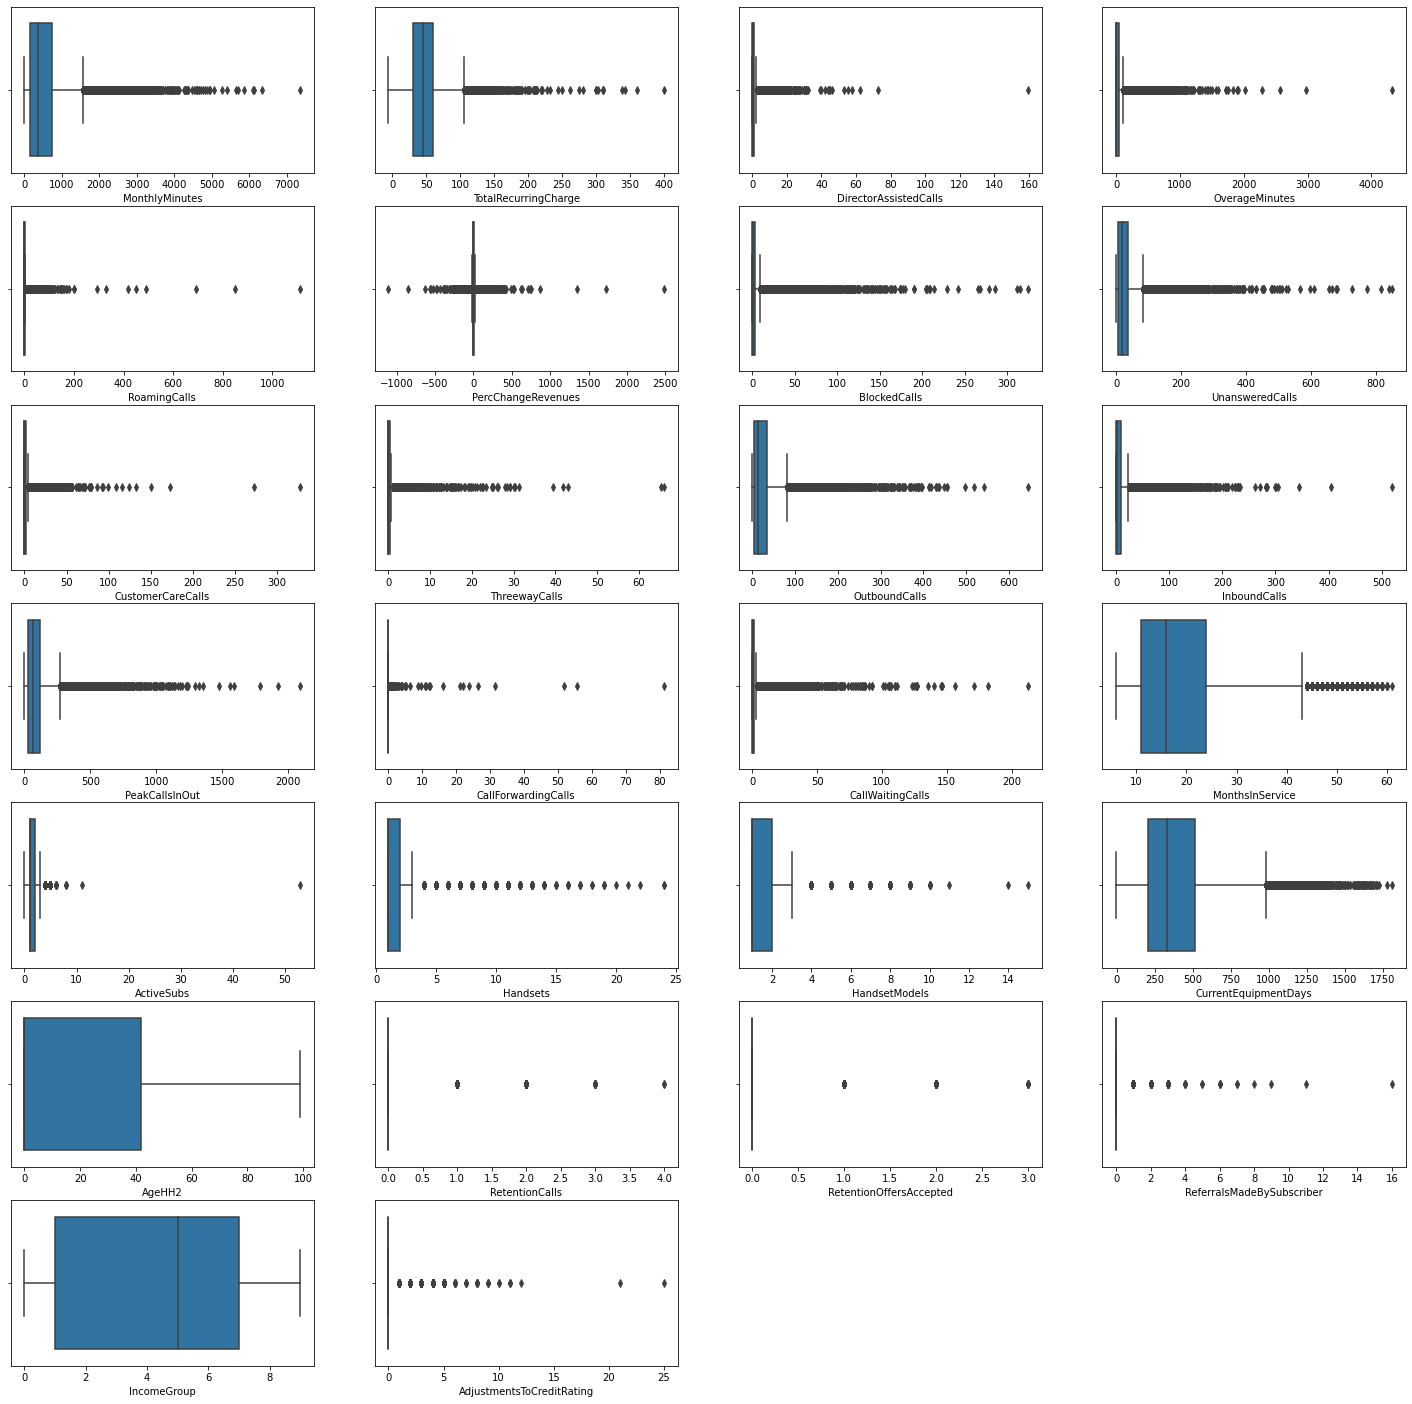

In [18]:
plt.figure(figsize=(25,25))
for i, j in enumerate(col):
    plt.subplot(7,4,i+1)
    sns.boxplot(df[j])
plt.show()

In [19]:
df2 = df.copy()

In [20]:
df3 = df2.drop(['HandsetModels','RetentionCalls','ReferralsMadeBySubscriber',
          'IncomeGroup','AdjustmentsToCreditRating','ServiceArea','UniqueSubs','DroppedBlockedCalls',
          'OffPeakCallsInOut','MonthlyRevenue','AgeHH1','ReceivedCalls','PercChangeMinutes','DroppedCalls','HandsetPrice','NonUSTravel',
                'NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam','RespondsToMailOffers'],axis=1)

In [21]:
df3.set_index('CustomerID',inplace=True)

In [22]:
df3.head()

,Churn,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeRevenues,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,OptOutMailings,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,219.0,22.0,0.25,0.0,0.0,-19.0,0.7,6.3,0.0,0.0,0.0,0.0,58.0,0.0,0.3,61,1,2.0,361.0,0.0,No,No,Yes,No,No,Known,Yes,No,Yes,Yes,0,No,1-Highest,Suburban,Professional,No
3000010,Yes,10.0,17.0,0.00,0.0,0.0,0.0,0.0,2.7,0.0,0.0,0.0,0.0,5.0,0.0,0.0,58,1,2.0,1504.0,42.0,Yes,No,No,No,No,Known,Yes,No,Yes,Yes,0,Yes,4-Medium,Suburban,Professional,Yes
3000014,No,8.0,38.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.3,0.0,0.0,60,1,1.0,1812.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,Yes,0,Yes,3-Good,Town,Crafts,Yes
3000022,No,1312.0,75.0,1.24,0.0,0.0,8.1,7.7,76.0,4.3,1.3,370.3,147.0,555.7,0.0,22.7,59,2,9.0,458.0,0.0,No,No,Yes,No,No,Known,Yes,No,No,Yes,0,Yes,4-Medium,Other,Other,No
3000026,Yes,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,54.0,No,No,No,No,No,Known,Yes,No,Yes,Yes,0,No,1-Highest,Other,Professional,Yes


In [23]:
X = df3.drop('Churn',axis=1)
y = df3[['Churn']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

In [24]:
X_train.head()

,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeRevenues,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,OptOutMailings,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3358790,217.0,43.0,0.0,0.0,7.7,-4.5,2.0,8.7,0.0,0.0,21.3,1.7,26.7,0.0,1.0,9,1,1.0,265.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,0,No,3-Good,Other,Other,Unknown
3005634,94.0,45.0,0.0,0.0,0.0,-0.1,3.0,25.0,0.0,0.0,4.3,0.0,29.3,0.0,0.0,45,1,1.0,1364.0,44.0,Yes,No,No,No,No,Known,Yes,No,No,Yes,0,No,2-High,Other,Professional,Yes
3084586,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26,1,2.0,205.0,0.0,No,Yes,Yes,No,No,Known,Yes,No,No,Yes,0,Yes,2-High,Other,Other,No
3255690,36.0,10.0,0.5,0.0,0.2,-1.2,0.0,4.7,0.0,0.0,5.7,4.3,13.3,0.0,0.0,10,2,1.0,297.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,0,No,5-Low,Other,Other,Unknown
3099678,1014.0,50.0,0.0,302.0,0.0,-54.2,2.3,107.0,2.0,0.3,43.3,13.7,302.0,0.0,5.3,22,1,2.0,397.0,0.0,No,No,Yes,No,No,Known,Yes,No,No,Yes,0,No,1-Highest,Other,Other,Yes


In [25]:
num_xtrain = X_train.select_dtypes(include=[np.number])
num_xtest = X_test.select_dtypes(include=[np.number])

cat_xtrain = X_train.select_dtypes(include=[np.object])
cat_xtest = X_test.select_dtypes(include=[np.object])

encode = {'Yes':1 , 'No' : 0}
y_train['Churn'] = y_train['Churn'].map(encode)
y_test['Churn'] = y_test['Churn'].map(encode)

In [26]:
num_xtrain_va = num_xtrain[['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls']]
num_xtest_va = num_xtest[['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls']]

num_xtrain.drop('RetentionOffersAccepted',axis=1,inplace=True)
num_xtest.drop('RetentionOffersAccepted',axis=1,inplace=True)

num_xtrain_sc = num_xtrain.drop(['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls'],axis=1)
num_xtest_sc = num_xtest.drop(['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls'],axis=1)


In [27]:
# Converting value added services into binary
lst = ['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls']
for i in lst:
    num_xtrain_va[i] = num_xtrain[i].apply(lambda x : 0 if x == 0.0 else 1)
    num_xtest_va[i] = num_xtest[i].apply(lambda x : 0 if x ==0.0 else 1)


In [28]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

In [29]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [30]:
num_xtrain_ss = pd.DataFrame(ss.fit_transform(num_xtrain_sc),columns=num_xtrain_sc.columns,index=num_xtrain_sc.index)
num_xtest_ss = pd.DataFrame(ss.transform(num_xtest_sc),columns=num_xtest_sc.columns,index=num_xtest_sc.index)

num_xtrain_mm = pd.DataFrame(mm.fit_transform(num_xtrain_sc),columns=num_xtrain_sc.columns,index=num_xtrain_sc.index)
num_xtest_mm = pd.DataFrame(mm.transform(num_xtest_sc),columns=num_xtest_sc.columns,index=num_xtest_sc.index)

In [31]:
x_train_fullss = pd.concat([num_xtrain_ss,num_xtrain_va],axis=1)
x_test_fullss = pd.concat([num_xtest_ss,num_xtest_va],axis=1)

In [32]:
x_train_fullmm = pd.concat([num_xtrain_mm,num_xtrain_va],axis=1)
x_test_fullmm = pd.concat([num_xtest_mm,num_xtest_va],axis=1)

In [33]:
num_xtrain_pt = pd.DataFrame(pt.fit_transform(num_xtrain_sc),columns=num_xtrain_sc.columns,index=num_xtrain_sc.index)
num_xtest_pt = pd.DataFrame(pt.transform(num_xtest_sc),columns=num_xtest_sc.columns,index=num_xtest_sc.index)

x_train_fullpt = pd.concat([num_xtrain_pt,num_xtrain_va],axis=1)
x_test_fullpt = pd.concat([num_xtest_pt,num_xtest_va],axis=1)

## Categorical Data Handling

In [34]:
cat_xtrain.drop(['PrizmCode','Occupation','MaritalStatus'],axis=1,inplace=True)
cat_xtest.drop(['PrizmCode','Occupation','MaritalStatus'],axis=1,inplace=True)

In [35]:
cat_xtrain.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,OptOutMailings,OwnsComputer,HasCreditCard,NewCellphoneUser,CreditRating
CustomerID,,,,,,,,,,,,
3358790,No,No,Yes,No,No,Unknown,No,No,No,No,No,3-Good
3005634,Yes,No,No,No,No,Known,Yes,No,No,Yes,No,2-High
3084586,No,Yes,Yes,No,No,Known,Yes,No,No,Yes,Yes,2-High
3255690,No,No,Yes,No,No,Unknown,No,No,No,No,No,5-Low
3099678,No,No,Yes,No,No,Known,Yes,No,No,Yes,No,1-Highest


In [36]:
encode = {'Yes':1 , 'No' : 0}
encode_1 = {'Known':1 , 'Unknown' : 0}

cat_xtrain['ChildrenInHH'] = cat_xtrain['ChildrenInHH'].map(encode)
cat_xtest['ChildrenInHH'] = cat_xtest['ChildrenInHH'].map(encode)

cat_xtrain['HandsetRefurbished'] = cat_xtrain['HandsetRefurbished'].map(encode)
cat_xtest['HandsetRefurbished'] = cat_xtest['HandsetRefurbished'].map(encode)

cat_xtrain['HandsetWebCapable'] = cat_xtrain['HandsetWebCapable'].map(encode)
cat_xtest['HandsetWebCapable'] = cat_xtest['HandsetWebCapable'].map(encode)

cat_xtrain['TruckOwner'] = cat_xtrain['TruckOwner'].map(encode)
cat_xtest['TruckOwner'] = cat_xtest['TruckOwner'].map(encode)

cat_xtrain['RVOwner'] = cat_xtrain['RVOwner'].map(encode)
cat_xtest['RVOwner'] = cat_xtest['RVOwner'].map(encode)

cat_xtrain['Homeownership'] = cat_xtrain['Homeownership'].map(encode_1)
cat_xtest['Homeownership'] = cat_xtest['Homeownership'].map(encode_1)

cat_xtrain['BuysViaMailOrder'] = cat_xtrain['BuysViaMailOrder'].map(encode)
cat_xtest['BuysViaMailOrder'] = cat_xtest['BuysViaMailOrder'].map(encode)


cat_xtrain['OptOutMailings'] = cat_xtrain['OptOutMailings'].map(encode)
cat_xtest['OptOutMailings'] = cat_xtest['OptOutMailings'].map(encode)


cat_xtrain['OwnsComputer'] = cat_xtrain['OwnsComputer'].map(encode)
cat_xtest['OwnsComputer'] = cat_xtest['OwnsComputer'].map(encode)

cat_xtrain['HasCreditCard'] = cat_xtrain['HasCreditCard'].map(encode)
cat_xtest['HasCreditCard'] = cat_xtest['HasCreditCard'].map(encode)

cat_xtrain['NewCellphoneUser'] = cat_xtrain['NewCellphoneUser'].map(encode)
cat_xtest['NewCellphoneUser'] = cat_xtest['NewCellphoneUser'].map(encode)


In [37]:
cat_xtrain['CreditRating'].unique()

array(['3-Good', '2-High', '5-Low', '1-Highest', '4-Medium', '7-Lowest',
       '6-VeryLow'], dtype=object)

In [38]:
encode2 = {'7-Lowest' : 1,'6-VeryLow' : 2,'5-Low' : 3,'4-Medium' : 4,'3-Good' : 5,'2-High' : 6,'1-Highest' : 7}
cat_xtrain['CreditRating'] = cat_xtrain['CreditRating'].map(encode2)
cat_xtest['CreditRating'] = cat_xtest['CreditRating'].map(encode2)

In [39]:
X_train_ss = pd.concat([x_train_fullss,cat_xtrain],axis=1)
X_test_ss = pd.concat([x_test_fullss,cat_xtest],axis=1)

In [40]:
X_train_mm = pd.concat([x_train_fullmm,cat_xtrain],axis=1)
X_test_mm = pd.concat([x_test_fullmm,cat_xtest],axis=1)

In [41]:
X_train_pt = pd.concat([x_train_fullpt,cat_xtrain],axis=1)
X_test_pt = pd.concat([x_test_fullpt,cat_xtest],axis=1)

In [42]:
X_test = X_test_pt.copy()

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smo = SMOTE()

In [45]:
X_train, y_train = smo.fit_resample(X_train_pt,y_train)

# PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
cov_matrix_train = np.cov(X_train.T)
cov_matrix_test = np.cov(X_test.T)

eig_value_train, eig_vector_test = np.linalg.eig(cov_matrix_train)
eig_value_test, eig_vector_test = np.linalg.eig(cov_matrix_test)

In [48]:
tot_train = sum(eig_value_train)
tot_test = sum(eig_value_test)

In [49]:
var_exp_train = [(i/tot_train) * 100 for i in sorted(eig_value_train, reverse=True)]
var_exp_test = [(i/tot_test) * 100 for i in sorted(eig_value_test, reverse=True)]

In [50]:
cumsum_train = np.cumsum(var_exp_train)
cumsum_test = np.cumsum(var_exp_test)

In [51]:
len(eig_value_train)

32

### Scree Plot

[]

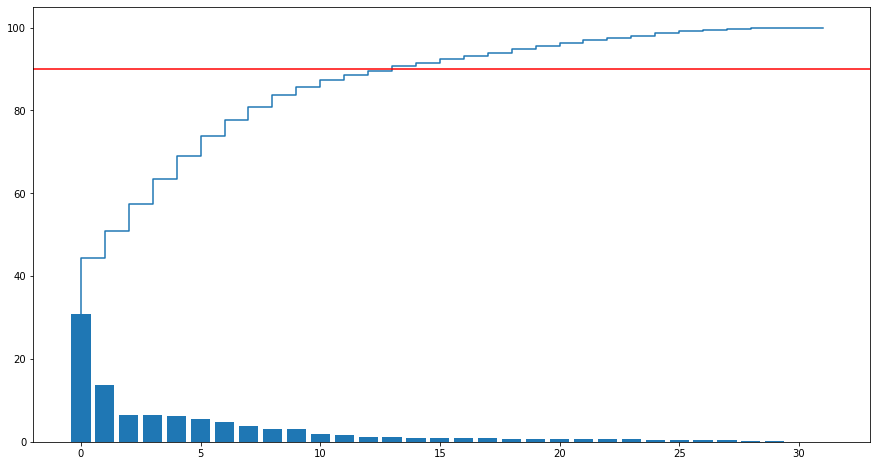

In [52]:
plt.figure(figsize=(15,8))
plt.bar(range(32),var_exp_train)
plt.step(range(32),cumsum_train)
plt.axhline(90,color='red')
plt.plot()

[]

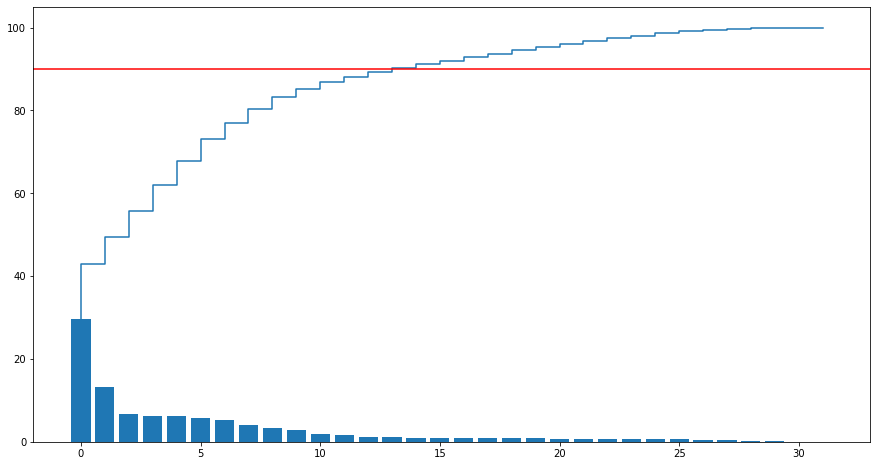

In [53]:
plt.figure(figsize=(15,8))
plt.bar(range(32),var_exp_test)
plt.step(range(32),cumsum_test)
plt.axhline(90,color='red')
plt.plot()

In [54]:
mypca = PCA(n_components=13)

In [55]:
X_train = pd.DataFrame(mypca.fit_transform(X_train))

In [56]:
X_train.shape

(49710, 13)

In [57]:
X_test = pd.DataFrame(mypca.fit_transform(X_test))

## Function For Confustion Matrix and ROC Curve

In [58]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Telecom Churn Prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# Model Building

In [60]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

log_modelpt = lg.fit(X_train,y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
y_pred_train = log_modelpt.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.59      0.58      0.59     24855
           1       0.59      0.60      0.59     24855

    accuracy                           0.59     49710
   macro avg       0.59      0.59      0.59     49710
weighted avg       0.59      0.59      0.59     49710



In [62]:
y_pred_test = log_modelpt.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.72      0.50      0.59     10652
           1       0.30      0.53      0.38      4274

    accuracy                           0.51     14926
   macro avg       0.51      0.51      0.49     14926
weighted avg       0.60      0.51      0.53     14926



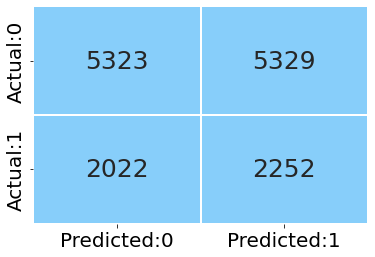

In [63]:
plot_confusion_matrix(log_modelpt, X_test)

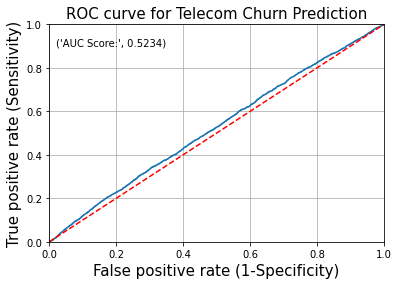

In [64]:
plot_roc(log_modelpt, X_test)

# Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [66]:
dc_model = dc.fit(X_train, y_train)

In [67]:
y_pred_train = dc_model.predict(X_train)
y_pred_test = dc_model.predict(X_test)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))
print()
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00     24855

    accuracy                           1.00     49710
   macro avg       1.00      1.00      1.00     49710
weighted avg       1.00      1.00      1.00     49710


Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.72      0.57      0.64     10652
           1       0.29      0.45      0.36      4274

    accuracy                           0.53     14926
   macro avg       0.51      0.51      0.50     14926
weighted avg       0.60      0.53      0.56     14926



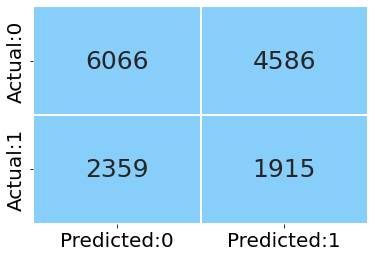

In [68]:
plot_confusion_matrix(dc_model, X_test)

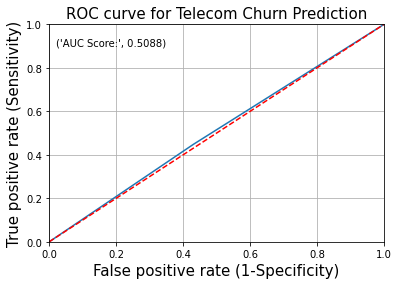

In [69]:
plot_roc(dc_model, X_test)

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()

In [72]:
rf_model = rf.fit(X_train,y_train)

In [73]:
y_pred_train = rf_model.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00     24855

    accuracy                           1.00     49710
   macro avg       1.00      1.00      1.00     49710
weighted avg       1.00      1.00      1.00     49710



In [74]:
y_pred_test = rf_model.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.73      0.67      0.70     10652
           1       0.32      0.39      0.35      4274

    accuracy                           0.59     14926
   macro avg       0.53      0.53      0.52     14926
weighted avg       0.61      0.59      0.60     14926



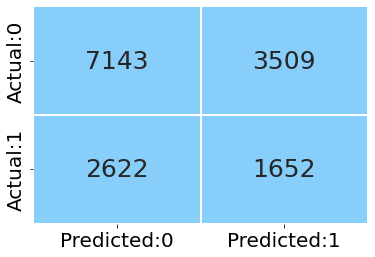

In [75]:
plot_confusion_matrix(rf_model, X_test)

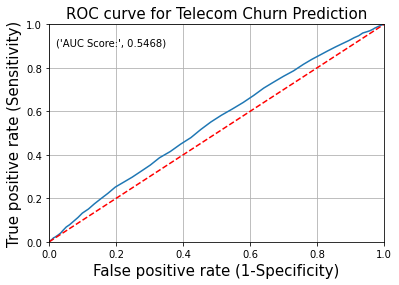

In [76]:
plot_roc(rf_model, X_test)

# XG Boost

In [77]:
from xgboost import XGBClassifier

In [78]:
xgc = XGBClassifier()

In [79]:
xgb_model = xgc.fit(X_train,y_train)

In [80]:
y_pred_train = xgb_model.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.80      0.74      0.77     24855
           1       0.76      0.82      0.79     24855

    accuracy                           0.78     49710
   macro avg       0.78      0.78      0.78     49710
weighted avg       0.78      0.78      0.78     49710



In [81]:
y_pred_test = xgb_model.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.74      0.50      0.59     10652
           1       0.31      0.56      0.40      4274

    accuracy                           0.52     14926
   macro avg       0.52      0.53      0.50     14926
weighted avg       0.61      0.52      0.54     14926



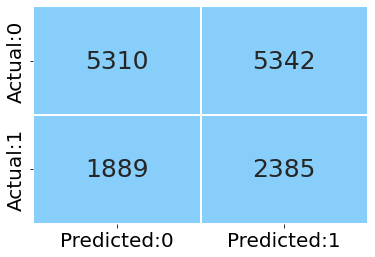

In [82]:
plot_confusion_matrix(xgb_model, X_test)

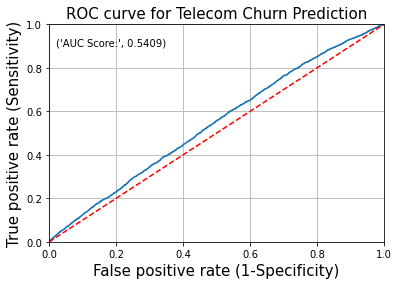

In [83]:
plot_roc(xgb_model, X_test)

# AdaBoost

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada = AdaBoostClassifier()

In [86]:
ada_model = ada.fit(X_train,y_train)

In [87]:
y_pred_train = ada_model.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.62      0.57      0.60     24855
           1       0.60      0.64      0.62     24855

    accuracy                           0.61     49710
   macro avg       0.61      0.61      0.61     49710
weighted avg       0.61      0.61      0.61     49710



In [88]:
y_pred_test = ada_model.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.73      0.44      0.55     10652
           1       0.30      0.60      0.40      4274

    accuracy                           0.49     14926
   macro avg       0.52      0.52      0.48     14926
weighted avg       0.61      0.49      0.51     14926



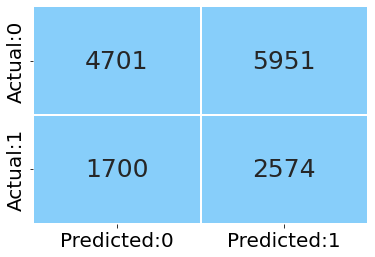

In [89]:
plot_confusion_matrix(ada_model, X_test)

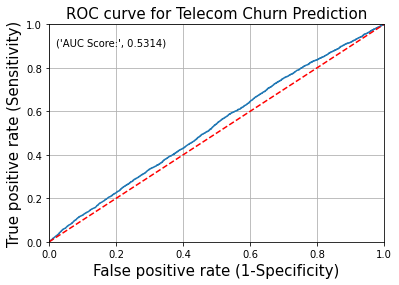

In [90]:
plot_roc(ada_model, X_test)

## KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [92]:
kn_model = kn.fit(X_train,y_train)

In [93]:
y_pred_train = kn_model.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.91      0.70      0.79     24855
           1       0.76      0.93      0.83     24855

    accuracy                           0.82     49710
   macro avg       0.83      0.82      0.81     49710
weighted avg       0.83      0.82      0.81     49710



In [94]:
y_pred_test = kn_model.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.73      0.52      0.61     10652
           1       0.31      0.53      0.39      4274

    accuracy                           0.52     14926
   macro avg       0.52      0.52      0.50     14926
weighted avg       0.61      0.52      0.55     14926



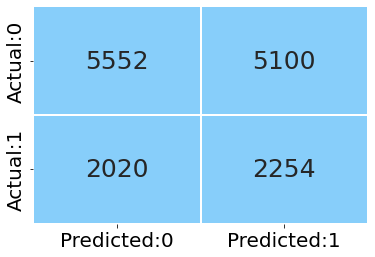

In [95]:
plot_confusion_matrix(kn_model, X_test)

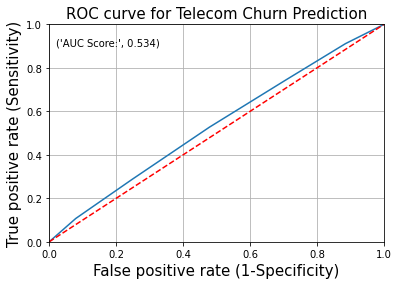

In [96]:
plot_roc(kn_model, X_test)

# Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [98]:
gnb_model = gnb.fit(X_train,y_train)

In [99]:
y_pred_train = gnb_model.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.60      0.56      0.58     24855
           1       0.59      0.63      0.61     24855

    accuracy                           0.60     49710
   macro avg       0.60      0.60      0.60     49710
weighted avg       0.60      0.60      0.60     49710



In [100]:
y_pred_test = gnb_model.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.73      0.50      0.60     10652
           1       0.30      0.54      0.39      4274

    accuracy                           0.51     14926
   macro avg       0.52      0.52      0.49     14926
weighted avg       0.61      0.51      0.54     14926



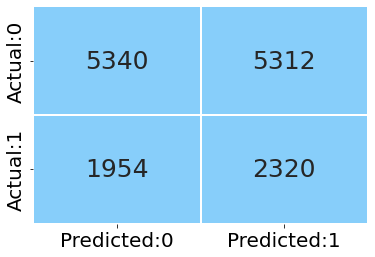

In [101]:
plot_confusion_matrix(gnb_model, X_test)

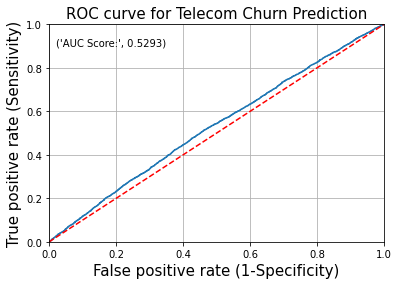

In [102]:
plot_roc(gnb_model, X_test)

# LDA

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [104]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_model = lda.fit(X_train,y_train)

In [105]:
y_pred_train = lda_model.predict(X_train)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.59      0.58      0.59     24855
           1       0.59      0.60      0.59     24855

    accuracy                           0.59     49710
   macro avg       0.59      0.59      0.59     49710
weighted avg       0.59      0.59      0.59     49710



In [106]:
y_pred_test = lda_model.predict(X_test)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.72      0.50      0.59     10652
           1       0.30      0.53      0.38      4274

    accuracy                           0.51     14926
   macro avg       0.51      0.51      0.49     14926
weighted avg       0.60      0.51      0.53     14926



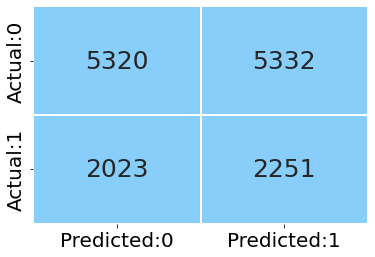

In [107]:
plot_confusion_matrix(lda_model, X_test)

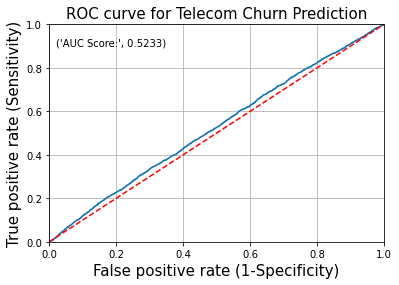

In [108]:
plot_roc(lda_model, X_test)